# <u> Utilising Python for Analysis of the SARS-CoV-2 (COVID-19) Sequence. <u>

### SARS-CoV-2 (COVID-19) is a single standed RNA virus responsible for the world pandemic currently faced by mankind. Here, Python is used to demonstrate the utility of such coding langauges to further explore DNA sequences with real world applications.

<i>Firstly, it is important to ensure that the required packages and functions are installed and imported. This is done with the following lines of code: <i>

In [16]:
pip install Biopython

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pandas

In [4]:
from Bio import SeqIO

In [24]:
from Bio.SeqUtils import GC

In [5]:
from Bio.SeqRecord import SeqRecord

In [19]:
import pandas as pd

 <i> The complete genome assembly was obtained from https://www.nature.com/articles/s41586-020-2008-3 and is freely accessible from NCBI Sequence Read Archive database under the BioProject accession number PRJNA603194. The complete genome sequence of COVID19 in GenBank can be found under the accession number MN908947. <i>

In [6]:
for sequence in SeqIO.parse("MN908947.fna", "fasta"):
    print('GenBankId: '  + sequence.id + '\nSize: ' + str(len(sequence))+' nucleotides')

GenBankId: MN908947.3
Size: 29903 nucleotides


<i> This line of code takes a file type, in this case a fasta sequence, and reports the sequence back as a SeqRecord object which can be read by Biopython for further use. For example, the str(len(sequence)) function can be used to take a string as an argument, e.g. the COVID-19 sequence, and return its length. The output states that the sequence length for the genome assembly of COVID-19 is 29,903 nucleotide bases long. <i>

In [7]:
DNAseq = SeqIO.read("MN908947.fna", "fasta")

In [8]:
DNA = DNAseq.seq
print(DNA[:500])

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTG


<i> This takes the COVID-19 sequence and creates an object called DNAseq which is read in as a SeqRecord object that can be recognised by Biopython. An object called DNA is then created from just the sequence of DNAseq. The first 500 nucleotides are then printed to view the sequence and ensure it has been read by the software correctly (29,903 nucleotides can be quite lengthy to read!). <i>

In [9]:
dna_list = list(DNA)

<i> The sequence loaded is initially read a string by Biopython, so in order to count the contents of the sequence assembly, the string must be converted into a list. This is done using the above function. <i>

<i> Counting of each respective nucleotide is undertaken using the following code: <i>

In [20]:
count_DNA = DNA
nucleotides={}
for n in count_DNA:
    if n in nucleotides:
        nucleotides[n] += 1
    else:
        nucleotides[n] =  1
print(nucleotides)


n_count = pd.DataFrame(data=nucleotides, index=[0]).T.reset_index()
n_count = n_count.rename(columns={0: 'frequency', 'index': 'nucleotides'})
n_count = n_count.sort_values(by=['frequency'], ascending=True)

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}


<i> A loop is set up to count each nucleotide base (A, T, G and C). When the computer reads either an A, T , G or C from the DNA list, a 1 is added to that specific nucleotide which has been created into a dictonary called nucleotides through the use of '{}'. This allows for a value to be mapped onto each nucleotide base. If the computer does not read that specific nuceleotide then a one is not added and the value remains unchanged. This is done seperately for each nucleotide base until all four have been counted and this is then printed onto the screen to be evaluated. The dictionary nucleotides is then placed into a dataframe to create the graph below. <i>

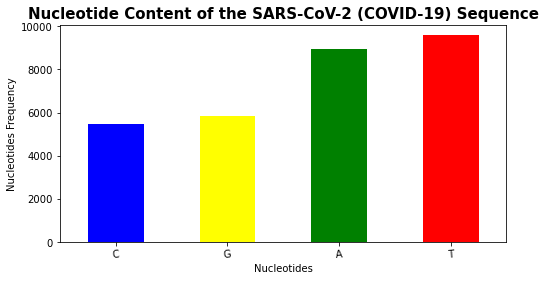

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
a= n_count['frequency'].plot.bar(color= ['blue', 'yellow', 'green', 'red'])
plt.xticks(rotation=5)
plt.ylabel("Nucleotide Base Frequency")
r=list(range(len(n_count)))
plt.xticks(r, n_count.nucleotides)
plt.xlabel("Nucleotide Bases")
plt.title("Nucleotide Base Content of the SARS-CoV-2 (COVID-19) Sequence", weight='bold', size=15)
plt.show()

<i> From the bar chart above, we can say that the %GC content of the SARS-CoV-2 (COVID-19) sequence is less than 50%. To get the percentage of the GC content, the below code can be used. The round function is used to round ther percentage to the nearest whole number. <i>

In [32]:
GC_COVID19=GC(DNA)
print ("The GC content of SARS-CoV-2 (COVID-19) is", round(GC_COVID19), "%") 

The GC content of SARS-CoV-2 (COVID-19) is 38 %


**mRNA sequence was obtained using Biopython function.transcribe which converts our cDNA into mRNA.**

In [23]:
mRNA = DNA.transcribe()

In [36]:
print(mRNA[:200])

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGU


The cDNA sequence has been correctly converted to an mRNA sequence (U instead of T).

Without removal of the Poly A tail, a warning appeared in trying to translate the mRNA into an amino acid sequence as the length was not divisible by 3. However, this method has not accounted for other post-translational modifications. Something to explore ?

In [26]:
Less_polyA = mRNA.rstrip("A")

In [31]:
print("Length of mRNA minus Poly A tail:",len(Less_polyA))

Length of mRNA minus Poly A tail: 29870


**The mRNA sequence was then translated into amino acids.**

In [27]:
Amino_Acid = Less_polyA.translate()

In [37]:
print(Amino_Acid[:200])

IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCG


In [29]:
print("Length of Protein:",len(Amino_Acid))

Length of Protein: 9956


Identification of proteins from amino acid sequence. This separates the polypeptides at the stop codons, indicated by "*". 

In [74]:
Proteins = Amino_Acid.split('*')
print(Proteins[:10])

[Seq('IKGLYLPR'), Seq('QTNQLSISCRSVL'), Seq('TNFKICVAVTRLHA'), Seq('CTHAV'), Seq('LITNYCR'), Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'), Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'), Seq('RWHLWLSRS'), Seq('KRRFAST'), Seq('TALCVHQTFGCSNCTSWSCYG')]


**The smallest known functional proteins are 20 amino acids in length so all the chains shorter than this can be removed:**

In [75]:
for i in Proteins[:]:
    if len(i) < 20:
        Proteins.remove(i)

**The protein sequences can be converted into a dataframe to better visualise the sequences.**

In [76]:
proteinas=pd.DataFrame(Proteins)
proteinas['amino acid sequence'] = proteinas[0].apply(str)
proteinas['Protein length'] = proteinas[0].apply(len)
proteinas.rename(columns={0: "sequence"}, inplace=True)
pro=proteinas.drop('sequence', axis=1)
pro= pro.sort_values(by=['Protein length'], ascending=False)

In [77]:
pro

,amino acid sequence,Protein length
48,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
61,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
68,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
62,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
67,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
...,...,...
72,PEWRTQWGAIKTTSAPRFTQ,20
39,LLRCSYNCHVFGQRYCFYVC,20
19,FKNYRRGWPHRSNGCLCRQF,20
22,MGFNCFWLSCRVVFGIYSFH,20


**These sequences can now be matched with online databases (BLAST) to identify the proteins.**